C:\Users\josel\AppData\Local\Temp\ipykernel_932\775116801.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([u'é', u'ã', u'â'])


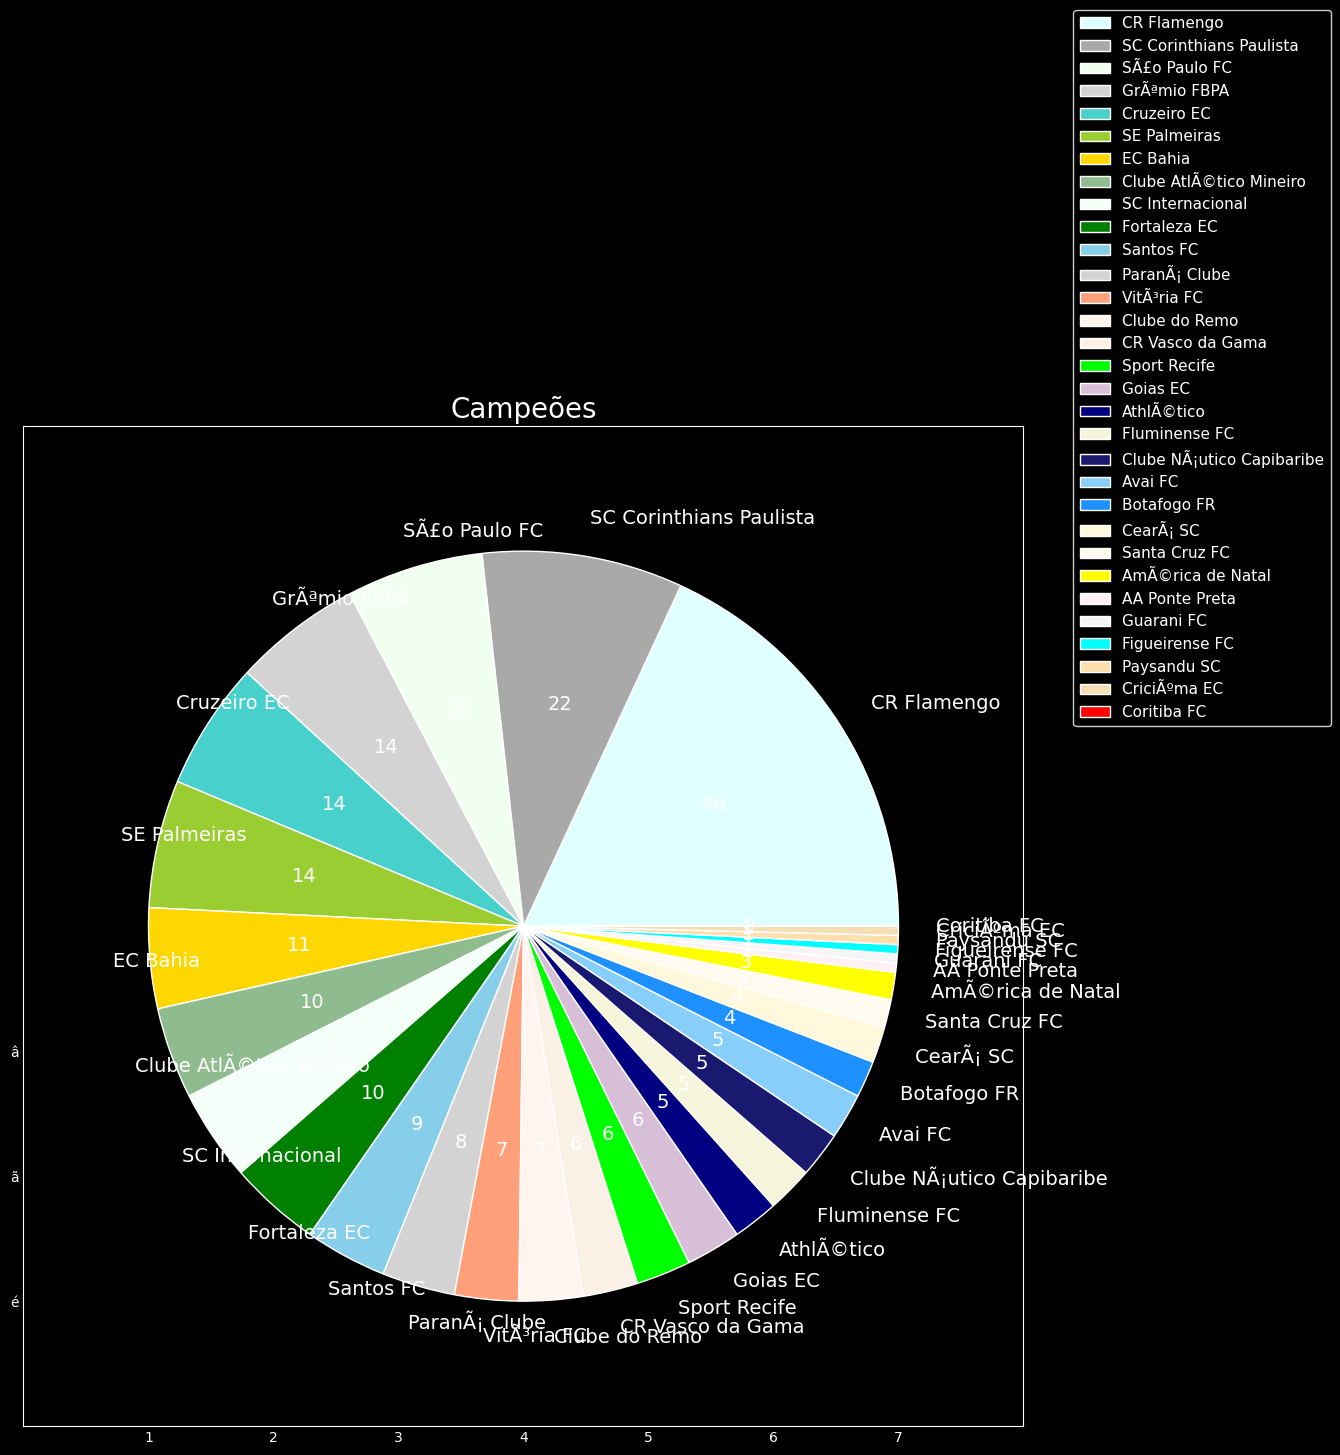

In [2]:
from matplotlib import pyplot as plt, colors as pltc
import numpy as np
from random import sample

import analysis

class Generate_Charts:
    def __init__(self, sheet_titles):
        self.sheet_titles = sheet_titles

    def autopct_format(self,values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{v:d}'.format(v=val)
        return my_format

    def championship_chart(self):
        plt.style.use('_mpl-gallery-nogrid')
        plt.style.use(['dark_background'])
        x = list(self.sheet_titles.keys())
        y = []

        for i in self.sheet_titles:
            y.append(self.sheet_titles[i][0]['titles'])

        all_colors = [k for k,v in pltc.cnames.items()]
        colors = sample(all_colors, len(y))

        fig, ax = plt.subplots()
        fig.subplots_adjust(10,0,20,20)
        ax.set_yticklabels([u'é', u'ã', u'â'])
        ax.set_title('Campeões', fontsize=20)
        ax.pie(y, autopct=self.autopct_format(y),colors=colors, labels=x, radius=3, center=(4, 4),
               wedgeprops={"linewidth": 1, "edgecolor": "white"}, textprops={'fontsize': 14}, frame=True)
        
        plt.legend(x, loc=(1.05, 0.7), shadow=True,  prop={'size': 11})

        ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
               ylim=(0, 8), yticks=np.arange(1, 8))
        plt.show()

    def caller(self):
        self.championship_chart()

if (__name__ == '__main__'):
    sheet_link = 'https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vS5qVKbg9hoLHg00Y5AqZu5XQxylCKHDjlOL0y3MtDRAVHmJcdkCp9tzi5m9kXwES8ObCqplRXHSW4M/pubhtml#'
    data = analysis.Analysis(sheet_link)
    data.caller()

    main = Generate_Charts(data.sheet_titles)
    main.caller()